In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np

with MPRester("afEtUeAVrpiToqMH") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-961693")
    
    band = m.get_bandstructure_by_material_id("mp-961693")
    gap = band.get_band_gap()


Largeur (en eV) de la bande interdite = 0.44120000000000026


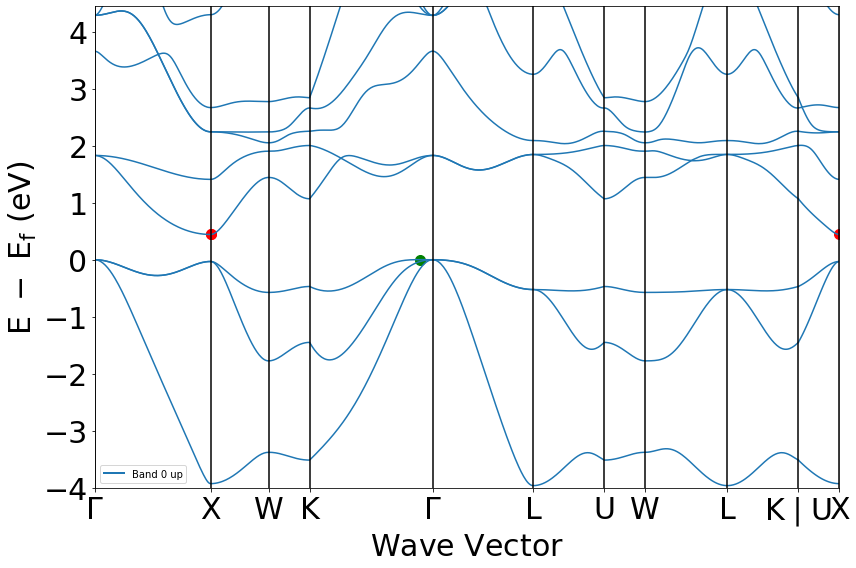

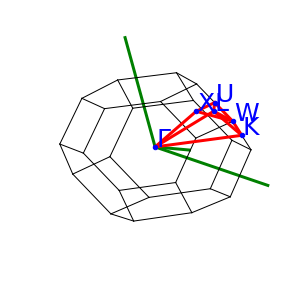

In [2]:
print("Largeur (en eV) de la bande interdite = " + str(gap.get('energy')))

plot = BSPlotter(band)
plot.get_plot(vbm_cbm_marker=True)
plot.plot_brillouin()


In [3]:
bs = BSPlotter(band)
data = bs.bs_plot_data()

vbm = band.get_vbm()
print("La dernière bande de valence est la : ",str(vbm.get('band_index')))

cbm = band.get_cbm()
print("La première bande de conduction est la : ",str(cbm.get('band_index')))


La dernière bande de valence est la :  defaultdict(<class 'list'>, {<Spin.up: 1>: [17]})
La première bande de conduction est la :  defaultdict(<class 'list'>, {<Spin.up: 1>: [18]})


In [4]:
#on calcule la dernière (première) bande de valence (conduction) 

distances = data.get('distances')
energy = data.get('energy') 

#[valeur, index]
val_max = [0,0]
val_min = [1000,0]
cond_max = [0,0]
cond_min = [1000,0]

for i in range(0,len(distances)):
    #calcul des pentes les plus ( et moins) fortes dans la bande de valence ( et conduction)
    slope_val = abs(energy["1"][i][17][-1]-energy["1"][i][17][0])/(distances[i][-1]-distances[i][0])
    slope_cond = abs(energy["1"][i][18][-1]-energy["1"][i][18][0])/(distances[i][-1]-distances[i][0])
    
    
    if(slope_val> val_max[0]):
        val_max[0] = slope_val
        val_max[1] = i
        
    if(slope_val< val_min[0]):
        val_min[0] = slope_val
        val_min[1] = i
        
    if(slope_cond > cond_max[0]):
        cond_max[0] = slope_cond
        cond_max[1] = i
        
    if(slope_cond < cond_min[0]):
        cond_min[0] = slope_cond
        cond_min[1] = i
        
        

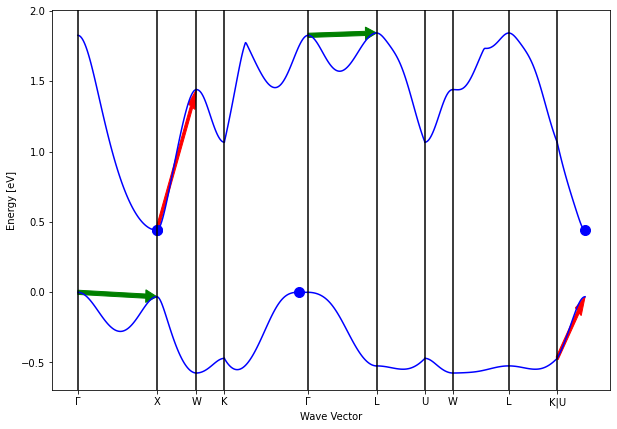

In [43]:
#dispersion max et min sur les bandes de valences et de conduction

Vbm = data.get("vbm")
Cbm = data.get("cbm")

figure,axes = plt.subplots(1,1,figsize=(10,7))

for i in range(0, len(distances)):
    plt.plot(distances[i],energy['1'][i][17],'b')
    plt.plot(distances[i],energy['1'][i][18],'b')
    
for i in range(0, len(Vbm)):
    x,y= Vbm[i]
    plt.plot(x, y, 'ob', markersize=10)
for i in range(0, len(Cbm)):
    x, y = Cbm[i]
    plt.plot(x ,y ,'ob',markersize=10)

plt.arrow(distances[cond_max[1]][0], energy["1"][cond_max[1]][18][0], distances[cond_max[1]][-1]-distances[cond_max[1]][0], energy["1"][cond_max[1]][18][-1]- energy["1"][cond_max[1]][18][0], color='red', width=0.03, length_includes_head=True)
plt.arrow(distances[cond_min[1]][0], energy["1"][cond_min[1]][18][0], distances[cond_min[1]][-1]-distances[cond_min[1]][0], energy["1"][cond_min[1]][18][-1]- energy["1"][cond_min[1]][18][0], color='green', width=0.03, length_includes_head=True)
plt.arrow(distances[val_max[1]][0], energy["1"][val_max[1]][17][0], distances[val_max[1]][-1]-distances[val_max[1]][0], energy["1"][val_max[1]][17][-1]- energy["1"][val_max[1]][17][0], color='red', width=0.03, length_includes_head=True)
plt.arrow(distances[val_min[1]][0], energy["1"][val_min[1]][17][0], distances[val_min[1]][-1]-distances[val_min[1]][0], energy["1"][val_min[1]][17][-1]- energy["1"][val_min[1]][17][0], color='green', width=0.03, length_includes_head=True)

#en rouge est la dispersion maximale
#en vert est la dispertion minimale

d = []
for i in range(0, len(distances)):
    d.append(distances[i][0])
    plt.axvline(distances[i][0],0,color="black")
    
axes.set_xticks(d)
axes.set_xticklabels(['Γ','X',"W",'K','Γ',"L",'U','W',"L",'K|U',])

axes.set_xlabel('Wave Vector')
axes.set_ylabel('Energy [eV]')

plt.show()